# The Mood of Philosophers

#### Name: Linda LIn

## Introduction

Philosophy is the study of fundamental questions about existence, knowledge, values, reason, mind, and language. It explores the nature of reality, the meaning of life, and the essence of truth. It is also mysterious to many people. As a student majoring in math and statistics, the knowledge I know about philosophy is very rare. In this project, I will use the dataset History of Philosophy to explore about philosophy, and trying to figure out the difference of mood among different schools of philosophy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
import collections
import string
import seaborn as sns


from nltk.sentiment import SentimentIntensityAnalyzer


## Part 1 Exploring Data
Firstly, I load the dataframe from Kaggle, and look at these basic information about this dataset. 

In [2]:
# read dataframe
df = pd.read_csv("data/philosophy_data.csv")
df.head()

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   

                                      lemmatized_str  
0     what be new , Socrates , to make -PRON- lea...  
1   surely -PRON- be not prosecute anyone before ...  
2   the Athenians do not call this a prosecution ...  
3                          what be this -PRON- say ?  
4   someone must have indict -PRON- , for -PRON- ...

In [3]:
df.describe()

original_publication_date  corpus_edition_date  sentence_length
count              360808.000000        360808.000000    360808.000000
mean                 1326.800908          1995.155642       150.790964
std                   951.492193            23.002287       104.822072
min                  -350.000000          1887.000000        20.000000
25%                  1641.000000          1991.000000        75.000000
50%                  1817.000000          2001.000000       127.000000
75%                  1949.000000          2007.000000       199.000000
max                  1985.000000          2016.000000      2649.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


As you can notice, there are are ten columns in this dataset and most of them are different versions of the sentences. Each row represents a text. It also includes the title, school, author, and date of the sentences. Before this projec, I did not know anything about philosophy at all. However, when I saw the column school, I realize that there are several different schools of philosophy. There are 13 different schools and I plot a bar plot to view the number of text in each school. It shows that analytic has the most text whereas stoicism has the least text. Therefore we may guess that analytic has more authors than stoicism. We will use code to prove whether this guess is correct later.

In [5]:
# number of schools
df['school'].nunique()

13

<AxesSubplot: >

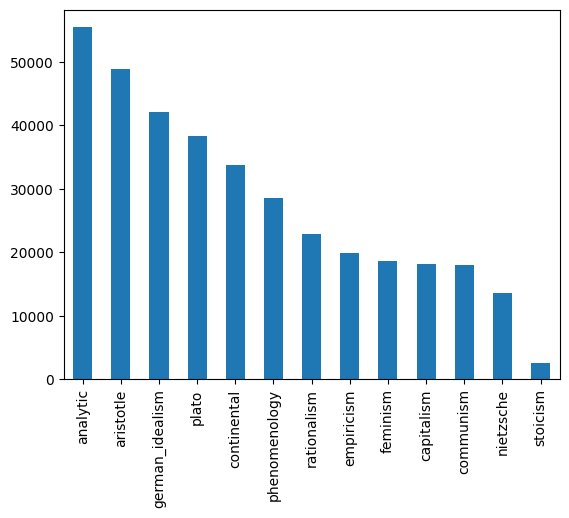

In [6]:
df['school'].value_counts().plot(kind = 'bar')

In order to prove the guess, I made a bar plot with school on x-axis and number of author on the y-axis. We can see that the result is different from what I thought. Analytic has the most authors, but aristole has only one author who wrote the second most texts, so there is not obvious relationship between number of text and number of authors.

<AxesSubplot: title={'center': 'number of author of each school'}, xlabel='school', ylabel='number of author'>

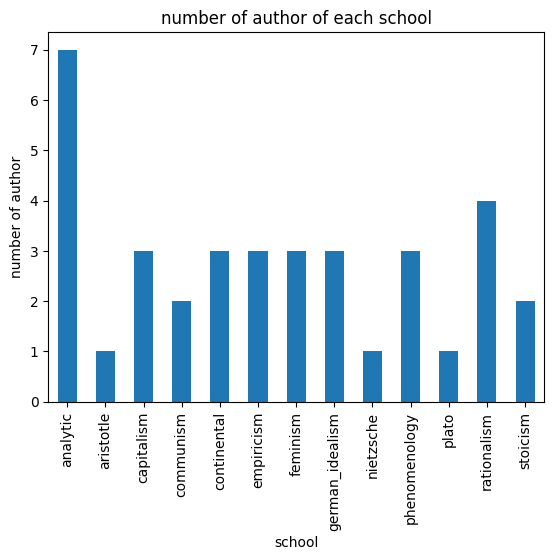

In [7]:
df_author = df.groupby(['school'])['author'].nunique()
df_author.plot(kind='bar', title='number of author of each school', ylabel='number of author', xlabel='school')

We also can dig into how the original publiction date is relate to schools. I created a bar plot with schools on the x-axis and the mean number of original publiction date on the y-axis. By doing so, we could have a sense of the active publiction period of each school. Based on the plot, we can see that aristotle, plato, and stoicism are relatively much earlier than the other schools.

<AxesSubplot: title={'center': 'publiction date of each school'}, xlabel='school', ylabel='original_publication_date'>

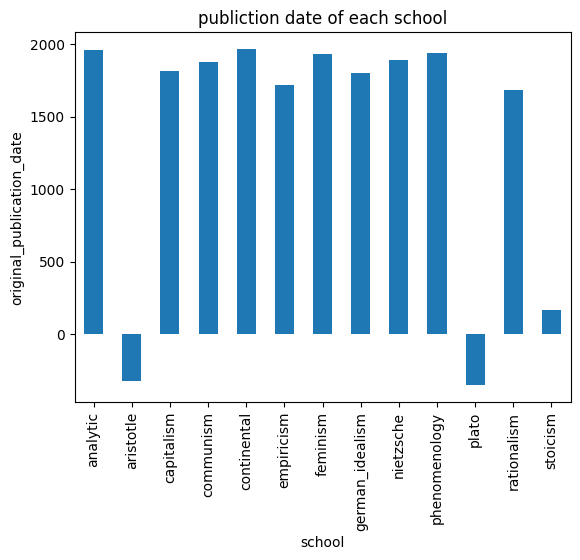

In [8]:
df_publication_date = df.groupby(['school'])['original_publication_date'].mean()
df_publication_date.plot(kind='bar', title='publiction date of each school', ylabel='original_publication_date', xlabel='school')

Moreover, I want to find out more characteristic about different schools and the writing style of different schools, so I wonder maybe some schools like longer text and some like shorter text. I plot two bar graph both with schools on x-axis, but one with mean sentence length on y and the other one with mean tokinize number on the y-axis. From the plots we can see that the overall trend for this two plots are very similar. Analystic, nietzsche, and plato has relitively fewer words than others, but there's not much distinctions among different schools.

<AxesSubplot: title={'center': 'mean sentence length of each school'}, xlabel='school', ylabel='mean sentence length'>

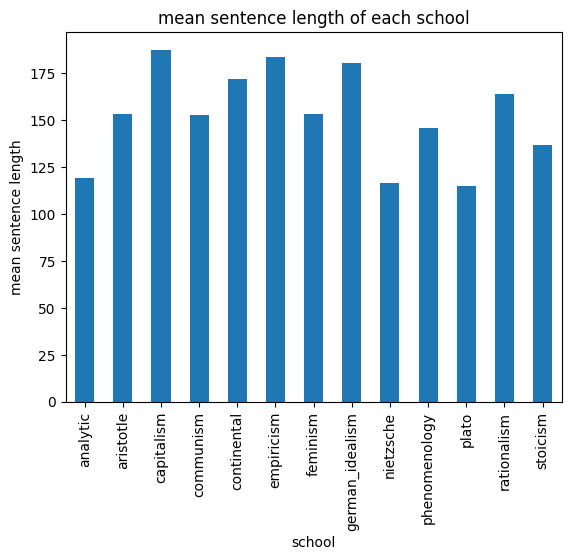

In [9]:
df_sentence_length = df.groupby(['school'])['sentence_length'].mean()
df_sentence_length.plot(kind='bar', title='mean sentence length of each school', ylabel='mean sentence length', xlabel='school')

<AxesSubplot: title={'center': 'mean tokenizednumber of each school'}, xlabel='school', ylabel='mean tokenized number'>

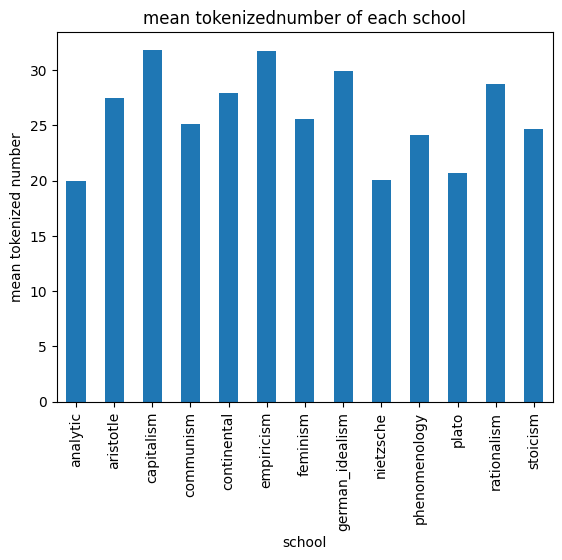

In [10]:
df['tokenized_number'] = list(df['tokenized_txt'].apply(lambda x: len(x.split())))
df_tokenized_number = df.groupby(['school'])['tokenized_number'].mean()
df_tokenized_number.plot(kind='bar', title='mean tokenizednumber of each school', ylabel='mean tokenized number', xlabel='school')

## Part 2 Word Cloud

In this part, we want to find out the most common words that philosophers would use. I will use word cloud to visualize the most frequent words.

To begin with the entire dataset, I will perform the word cloud and analysis with the lemmatized_str column which combine words with different forms to one word. I notice this column transform words like 'you' to 'PRON', so other than the regular stopwords, I need to get rid of 'PRON' as well. Also, the most frequent words does not conain punctuations, so I need to remove all punctuations. After the cleaning and analysing, we can easily find out that the most frequent words in the entire dataset are 'one', 'will', 'thing', 'say', 'man', 'may', 'make', 'must', 's', 'time'.

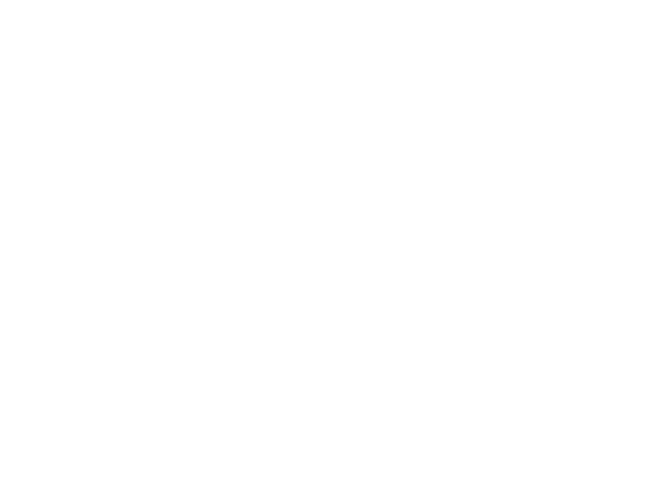

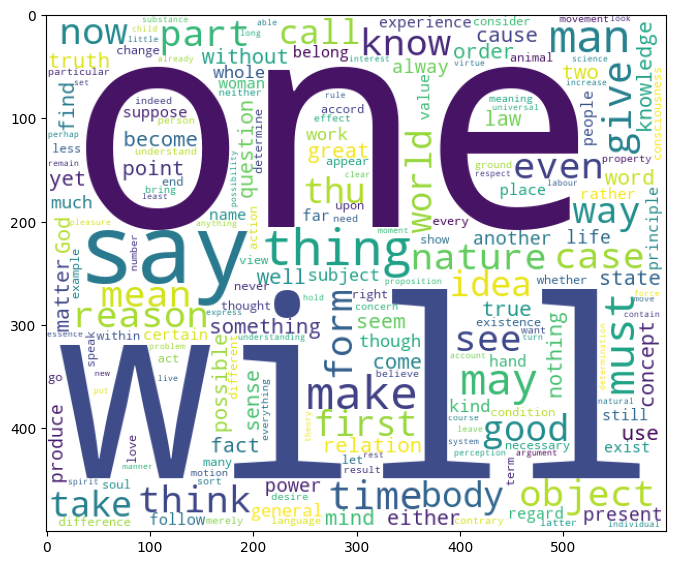

In [11]:
stopwords = set(STOPWORDS)
# let all lemmatized_str to be one string without stopwords
text = " ".join(i for i in df['lemmatized_str'].astype(str))
stopwords.update(['PRON'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=600, height=500).generate(text)
plt.axis("off")
plt.tight_layout(pad=0)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.show()



In [12]:
text = " ".join(i for i in df['lemmatized_str'].astype(str))
clean_text = text.translate(str.maketrans('', '', string.punctuation))
clean_words = [word for word in clean_text.split() if word not in stopwords]
counted_words = collections.Counter(clean_words)
# get the top 10 most common words in the sentence
counted_words.most_common(10)

[('one', 50271),
 ('will', 29977),
 ('thing', 28719),
 ('say', 26087),
 ('man', 24896),
 ('may', 22697),
 ('make', 22110),
 ('must', 21131),
 ('s', 18000),
 ('time', 17247)]

Now, we can perform the same approach on each school to see the difference of common words using by different schools.
The results show that the common words for each schools are
capitalism: 'great','price','may', 'country', 'upon', 'will', 'produce', 'money', 'part', 'value'
nietzsche: 'one', 'man', 'will', 'thou', 'even', 'thing', 'say', 'good', 'ye', 'great'
continental: 'one', 'form', 'madness', 's', 'difference', 'make', 'man', 'language', 'time', 'order'
aristotle: 'one','thing','man','will', 'must', 'say', 'part', 'animal', 'good', 'case'
empiricism: 'idea', 'one', 'may', 'man', 'make', 'mind', 'will', 'thing', 'object', 'without'
communism: 'labour', 'value', 'work', 'one', 'capital', 'production', 'commodity', 'form', 'time','power', 
plato:'say','one', 'thing', 'will', 'man', 'good', 'think', 'make', 'well', 'now'
phenomenology: 'world', 'one','thing', 'way', 'time', 'take', 'object', 'experience', 'make', 'present'
german_idealism: 'one', 'concept', 'object', 'self', 'reason', 'nature', 'consciousness', 'will', 'determination', 'thing'
analytic: 'one', 'may', 'say', 's', 'case', 'true', 'know', 'will', 'give', 'sense'
stoicism:'thou', 'thing', 'man', 'unto', 'thy', 'one', 'thee', 'nature', 'will', 'either'
rationalism: 'God', 'will', 'thing', 'one', 'body', 'mind', 'man', 'idea', 'say', 'make'
feminism:'woman', 'man', 's', 'one', 'will', 'love', 'make', 'life', 'child', 'give'

These schools' most common words are quite different from each other. Due to the reason that their main focus and topics are different, so the words they frequently use will be different.

feminism


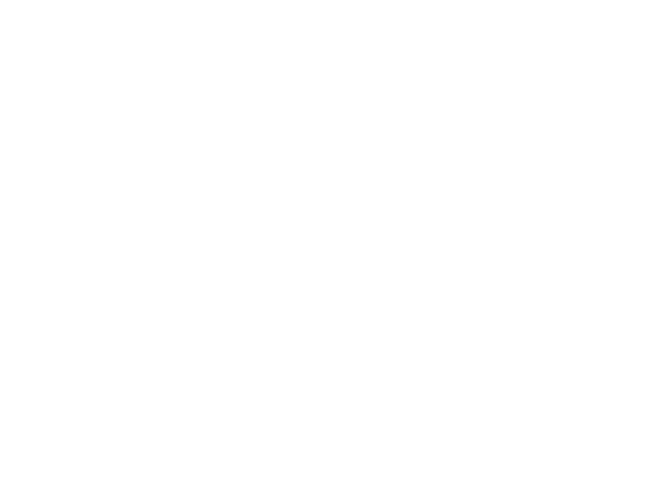

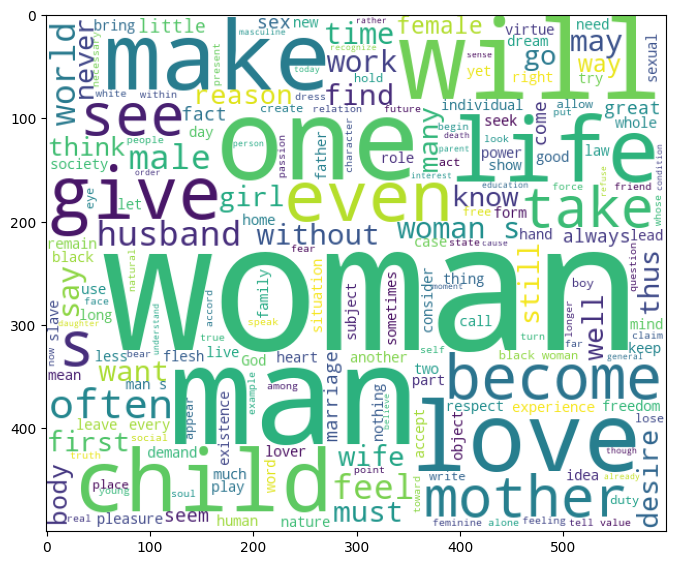

[('woman', 6038), ('man', 3050), ('s', 2825), ('one', 1770), ('will', 1635), ('love', 1180), ('make', 1121), ('life', 1090), ('child', 1018), ('give', 919)]
empiricism


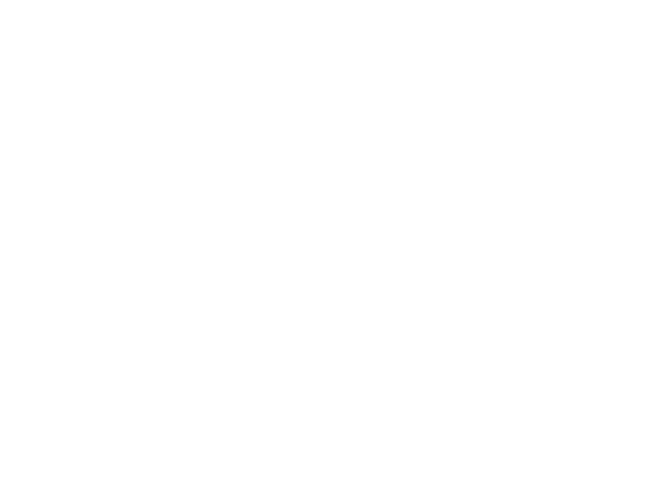

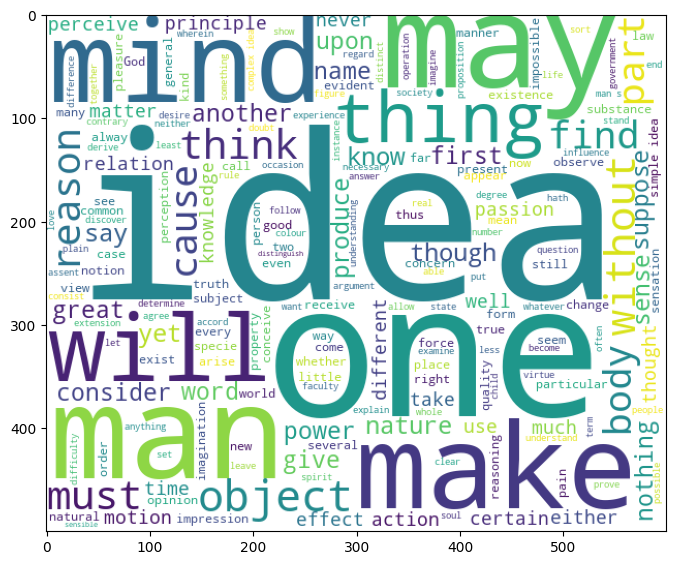

[('idea', 5752), ('one', 3376), ('may', 2996), ('man', 2971), ('make', 2545), ('mind', 2380), ('will', 2189), ('thing', 2041), ('object', 1728), ('without', 1552)]
aristotle


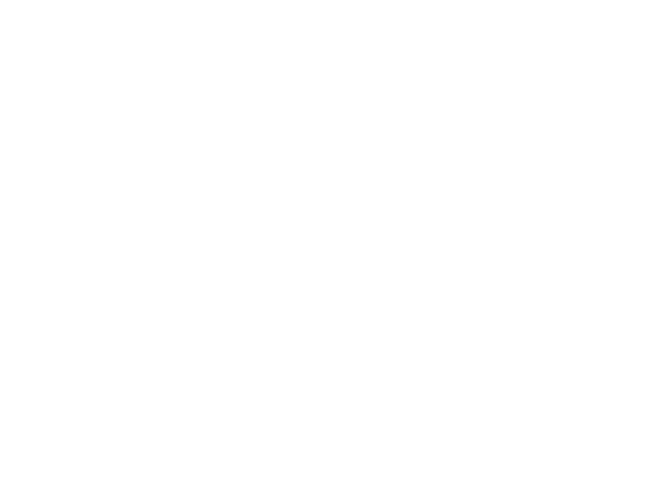

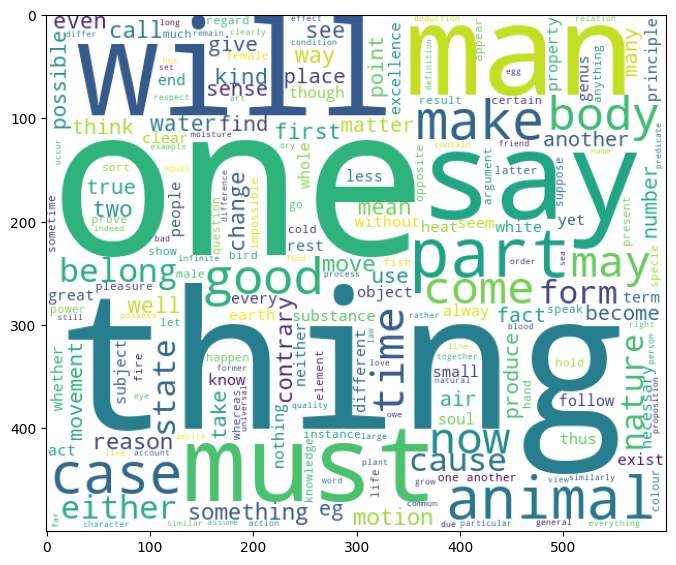

[('one', 9730), ('thing', 7366), ('man', 5642), ('will', 5434), ('must', 4469), ('say', 4410), ('part', 4020), ('animal', 3788), ('good', 3362), ('case', 3293)]
communism


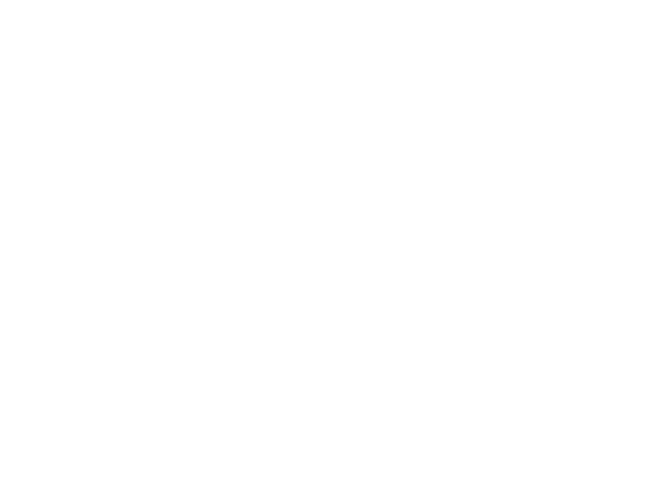

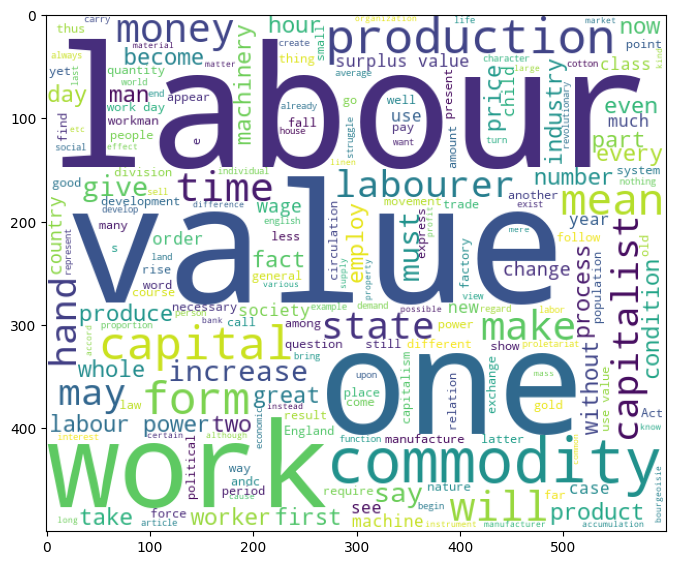

[('labour', 3322), ('value', 2733), ('work', 1950), ('one', 1806), ('capital', 1526), ('production', 1454), ('commodity', 1390), ('form', 1249), ('time', 1201), ('power', 1167)]
plato


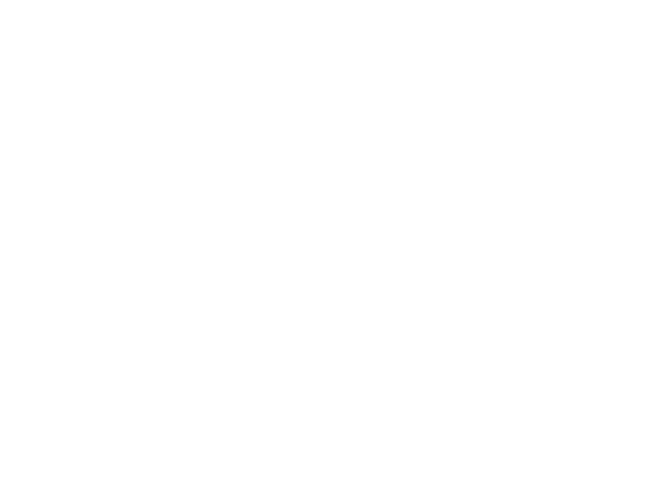

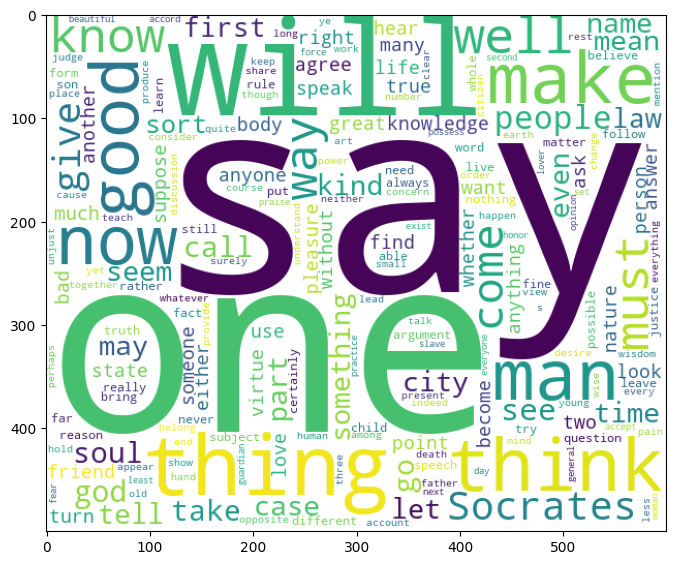

[('say', 5842), ('one', 5578), ('thing', 4605), ('will', 4473), ('man', 3403), ('good', 2905), ('think', 2808), ('make', 2762), ('well', 2536), ('now', 2447)]
german_idealism


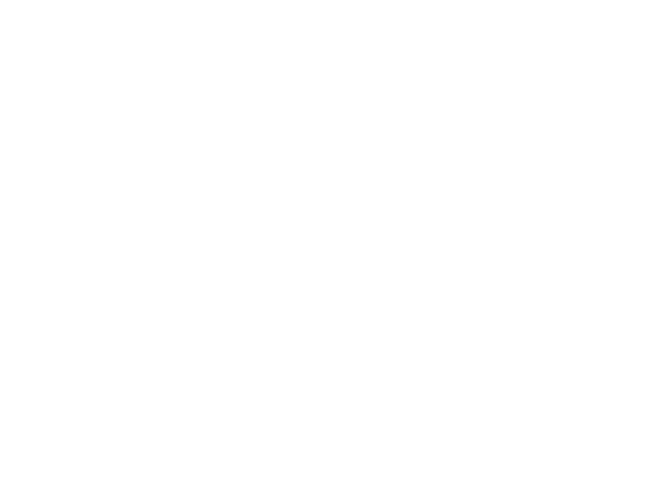

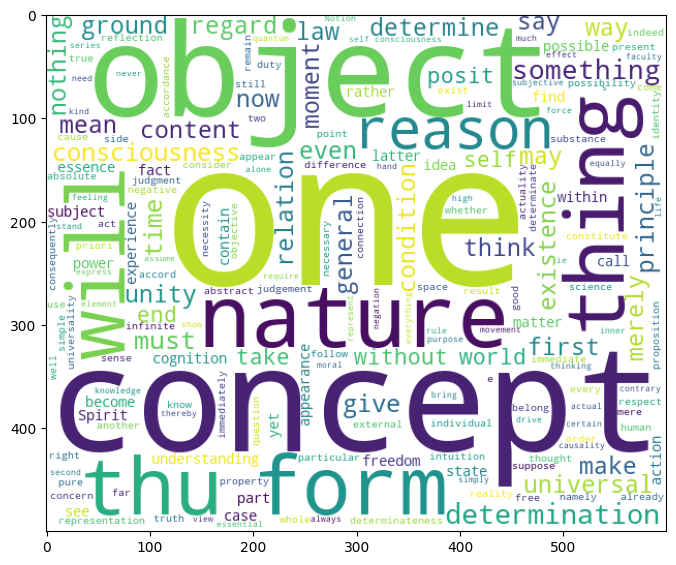

[('one', 7311), ('concept', 5603), ('object', 3995), ('self', 3750), ('reason', 3664), ('nature', 3344), ('consciousness', 3200), ('will', 3114), ('determination', 3082), ('thing', 3069)]
capitalism


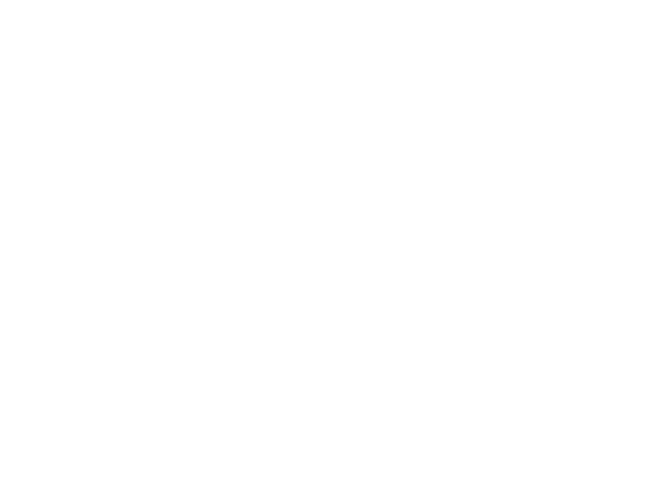

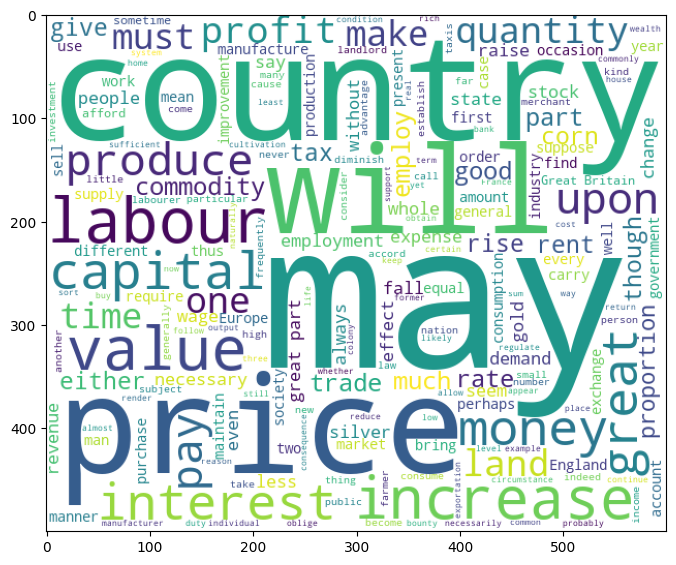

[('great', 2875), ('price', 2629), ('may', 2426), ('country', 2313), ('upon', 2210), ('will', 2130), ('produce', 1905), ('money', 1895), ('part', 1872), ('value', 1849)]
analytic


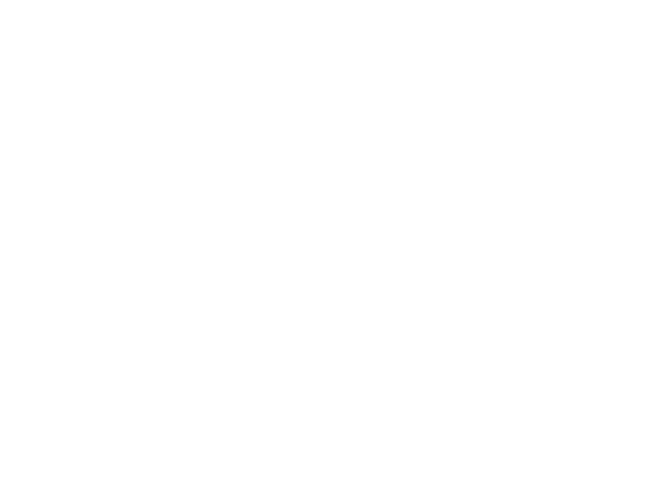

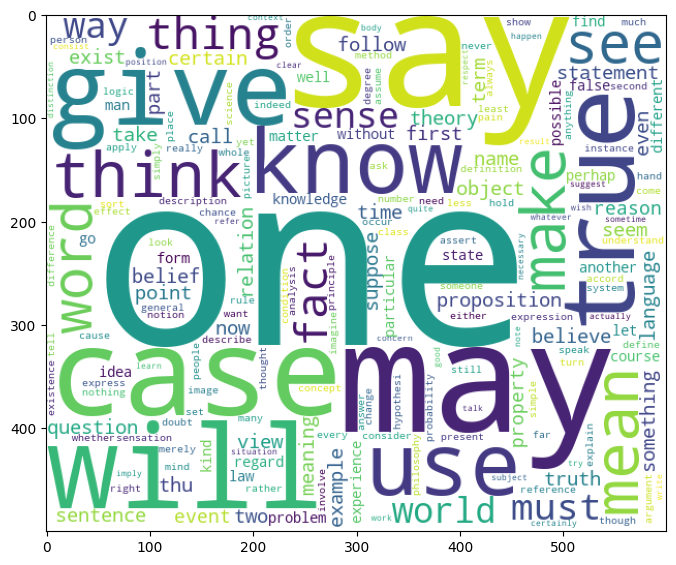

[('one', 6460), ('may', 5970), ('say', 5732), ('s', 3668), ('case', 3377), ('true', 3057), ('know', 3040), ('will', 2893), ('give', 2761), ('sense', 2741)]
rationalism


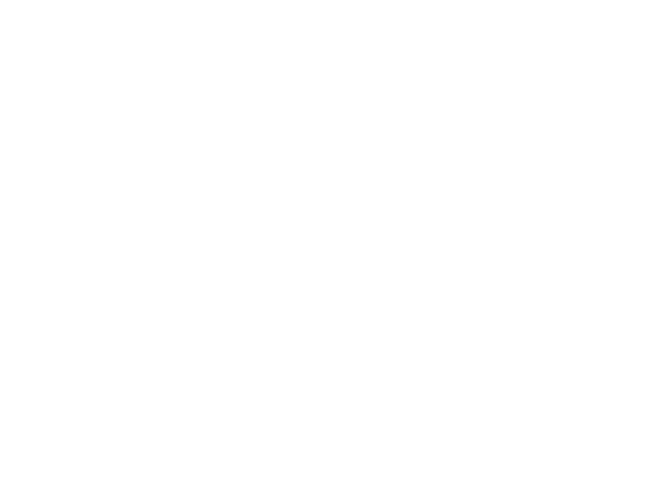

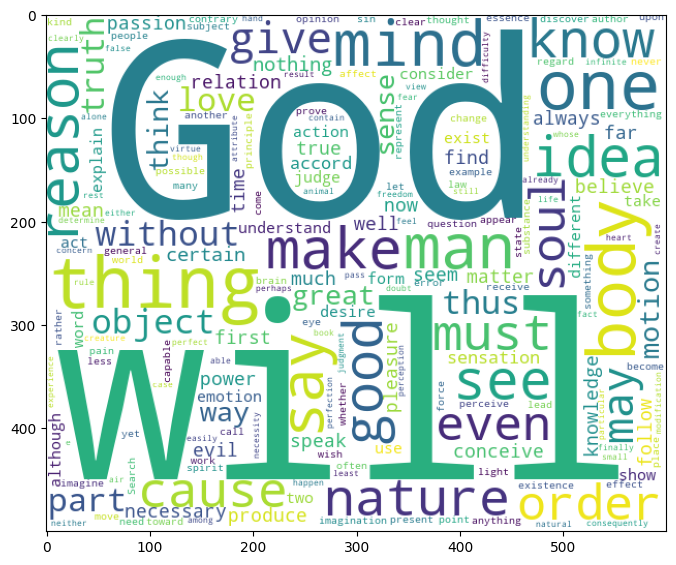

[('God', 3508), ('will', 3223), ('thing', 3184), ('one', 3101), ('body', 2952), ('mind', 2564), ('man', 2496), ('idea', 2202), ('say', 2050), ('make', 1845)]
nietzsche


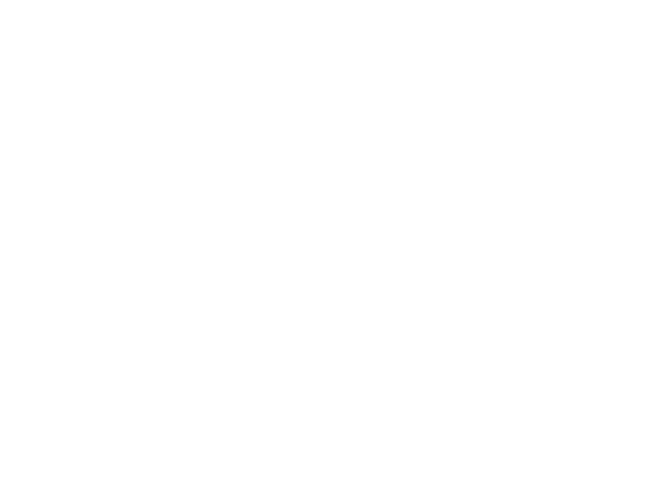

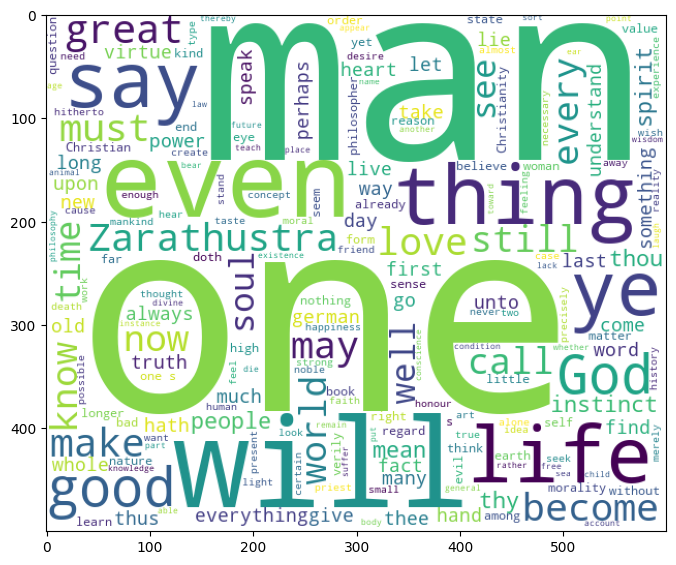

[('one', 2124), ('man', 1504), ('will', 965), ('thou', 848), ('even', 838), ('thing', 782), ('say', 738), ('good', 688), ('ye', 674), ('great', 663)]
continental


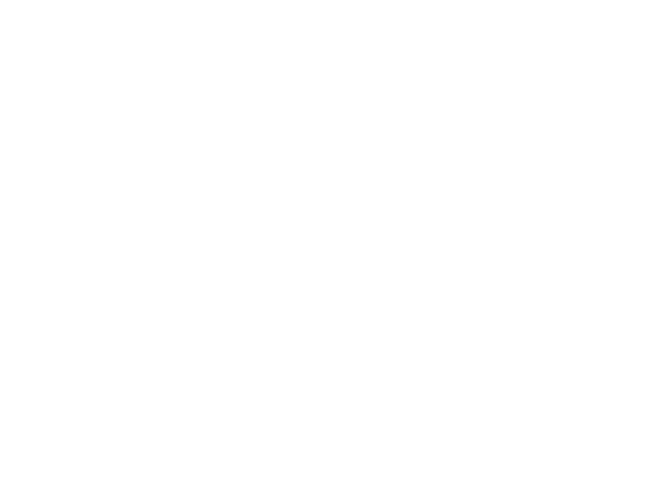

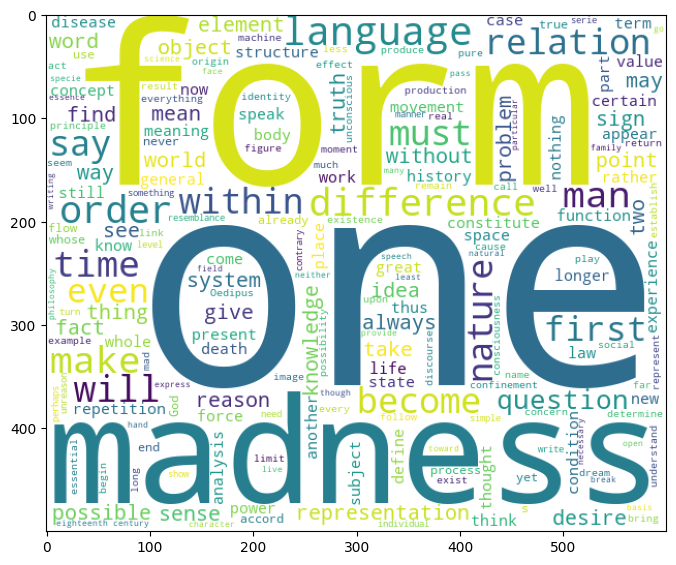

[('one', 4219), ('form', 3158), ('madness', 2277), ('s', 1908), ('difference', 1865), ('make', 1818), ('man', 1811), ('language', 1809), ('time', 1755), ('order', 1711)]
phenomenology


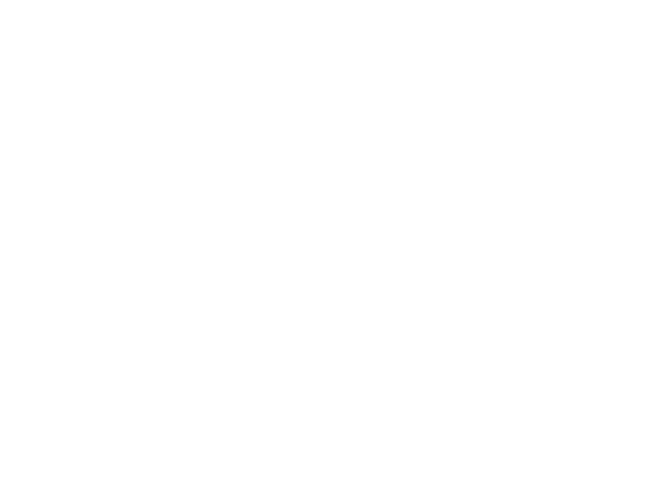

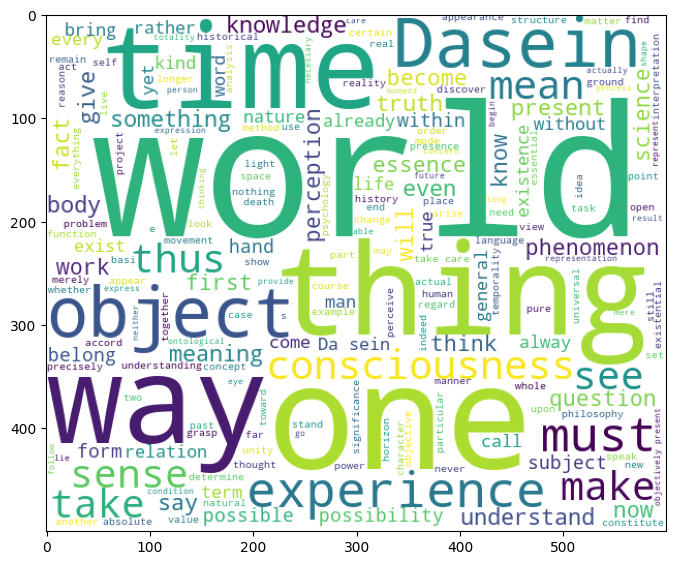

[('world', 4349), ('one', 2864), ('thing', 2257), ('way', 2005), ('time', 1878), ('take', 1774), ('object', 1706), ('experience', 1697), ('make', 1673), ('present', 1629)]
stoicism


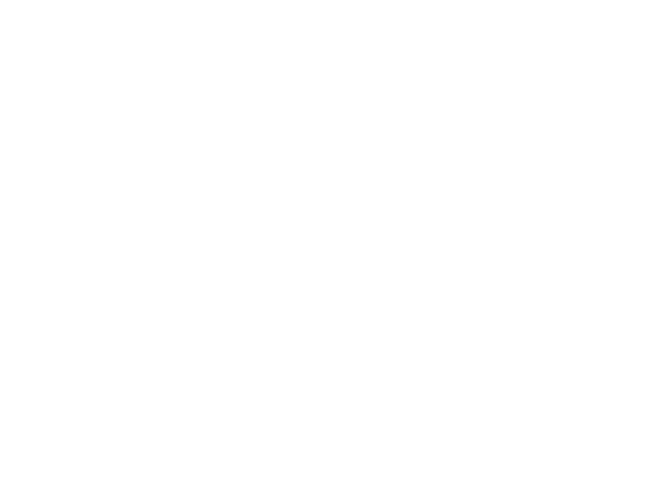

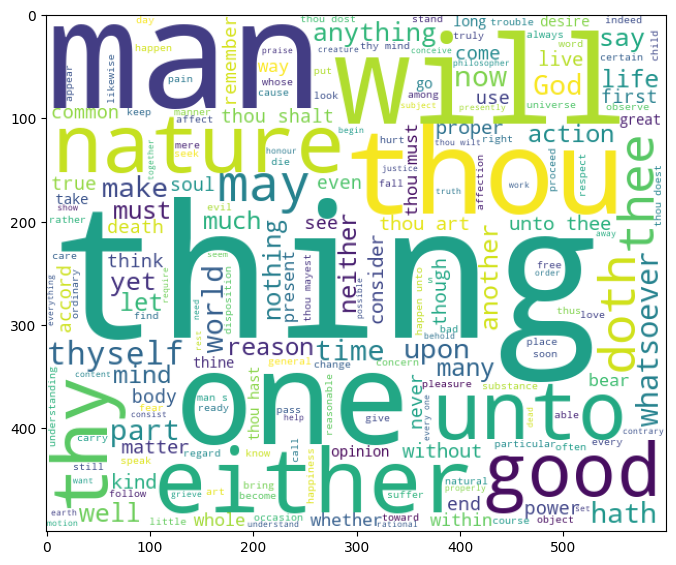

[('thou', 791), ('thing', 687), ('man', 472), ('unto', 436), ('thy', 338), ('one', 322), ('thee', 306), ('nature', 278), ('will', 258), ('either', 251)]


In [13]:
schools = list(set(df['school']))
for school in schools:
    print(school)
    df_school = df[df['school'] == school]
    text = " ".join(i for i in df_school['lemmatized_str'].astype(str))

    # get the word cloud for each school

    wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=600, height=500).generate(text)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.show()
    
    text = " ".join(i for i in df_school['lemmatized_str'].astype(str))
    clean_text = text.translate(str.maketrans('', '', string.punctuation))
    clean_words = [word for word in clean_text.split() if word not in stopwords]
    counted_words = collections.Counter(clean_words)
    # printing out the most common words in sentence for each school
    print(counted_words.most_common(10))

## Part3 Sentiment Analysis
Speaking about philosophy, the thing I am most curious about is whether there is a difference of mood between different schools. For example, one school is always pessimistic and the other one is optimistic. Therefore, I am going to use the sentiment intensity analyzer to create a column of ploarity which is the polarity of each text. There is one feature called compound in the polarity. If the compound is positive, then the mood of the text is positive. created a column called sentiment that has the result I got from analysing the compound, which telling me whether the text is positive or not. I tried to graph a bar plot of the number of each sentiment against each school. I found that analytic has the most positive, negative, and neutral text. I think the reason is because analytic has the most amount of text. Therefore, I realized, in order to solve the problem, I need to use the ratio of each sentiment instead.

In [14]:
df['lemmatized_no_punc'] = df['lemmatized_str'].str.replace(r'[^\w\s]+', '')
# create a new column with no stop words and punctuations
df['lemmatized_clean'] = df['lemmatized_no_punc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))



/var/folders/f0/3c3d31716rzd7nlkfrhvm19h0000gn/T/ipykernel_34387/2280271779.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['lemmatized_no_punc'] = df['lemmatized_str'].str.replace(r'[^\w\s]+', '')


In [15]:
analyze = SentimentIntensityAnalyzer()
df['polarity'] = df['lemmatized_clean'].apply(lambda x: analyze.polarity_scores(x))
df.head()

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   

                                      lemmatized_str  tokenized_number  \
0     what be new , Socrates , to make -PRON- lea...                23   
1   surely -PRON- be not prosecute anyone before ...                12   
2   the Athenians do not call this a prosecution ...                11   
3                          what be this -PRON- say ?                 5   
4   someone must have indict -PRON- , for -PRON- ...                19   

                                  lemmatized_no_punc  \
0     what be new  Socrates  to make PRON leave P...   
1   surely PRON be not prosecute anyone before th...   
2   the Athenians do not call this a prosecution ...   
3                             what be this PRON say    
4   someone must have indict PRON  for PRON be no...   

                                    lemmatized_clean  \
0  new Socrates make leave usual haunt Lyceum spe...   
1                surely prosecute anyone king archon   
2    Athenians call prosecution indictment Euthyphro   
3                                                say   
4         someone must indict go tell indict someone   

                                            polarity  
0  {'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'comp...  
1  {'neg': 0.314, 'neu': 0.349, 'pos': 0.337, 'co...  
2  {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...

In [16]:
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)
df.head()

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   

                                      lemmatized_str  tokenized_number  \
0     what be new , Socrates , to make -PRON- lea...                23   
1   surely -PRON- be not prosecute anyone before ...                12   
2   the Athenians do not call this a prosecution ...                11   
3                          what be this -PRON- say ?                 5   
4   someone must have indict -PRON- , for -PRON- ...                19   

                                  lemmatized_no_punc  \
0     what be new  Socrates  to make PRON leave P...   
1   surely PRON be not prosecute anyone before th...   
2   the Athenians do not call this a prosecution ...   
3                             what be this PRON say    
4   someone must have indict PRON  for PRON be no...   

                                    lemmatized_clean    neg    neu    pos  \
0  new Socrates make leave usual haunt Lyceum spe...  0.281  0.719  0.000   
1                surely prosecute anyone king archon  0.314  0.349  0.337   
2    Athenians call prosecution indictment Euthyphro  0.444  0.556  0.000   
3                                                say  0.000  1.000  0.000   
4         someone must indict go tell indict someone  0.000  1.000  0.000   

   compound  
0   -0.4404  
1    0.0516  
2   -0.4939  
3    0.0000  
4    0.0000

In [17]:
def change_to_sentiment(compound):
    if compound > 0:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [18]:
df['sentiment'] = df['compound'].apply(change_to_sentiment)

In [19]:
df.head()

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   

                                      lemmatized_str  tokenized_number  \
0     what be new , Socrates , to make -PRON- lea...                23   
1   surely -PRON- be not prosecute anyone before ...                12   
2   the Athenians do not call this a prosecution ...                11   
3                          what be this -PRON- say ?                 5   
4   someone must have indict -PRON- , for -PRON- ...                19   

                                  lemmatized_no_punc  \
0     what be new  Socrates  to make PRON leave P...   
1   surely PRON be not prosecute anyone before th...   
2   the Athenians do not call this a prosecution ...   
3                             what be this PRON say    
4   someone must have indict PRON  for PRON be no...   

                                    lemmatized_clean    neg    neu    pos  \
0  new Socrates make leave usual haunt Lyceum spe...  0.281  0.719  0.000   
1                surely prosecute anyone king archon  0.314  0.349  0.337   
2    Athenians call prosecution indictment Euthyphro  0.444  0.556  0.000   
3                                                say  0.000  1.000  0.000   
4         someone must indict go tell indict someone  0.000  1.000  0.000   

   compound sentiment  
0   -0.4404  Negative  
1    0.0516  Positive  
2   -0.4939  Negative  
3    0.0000   Neutral  
4    0.0000   Neutral

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'analytic'),
  Text(1, 0, 'aristotle'),
  Text(2, 0, 'capitalism'),
  Text(3, 0, 'communism'),
  Text(4, 0, 'continental'),
  Text(5, 0, 'empiricism'),
  Text(6, 0, 'feminism'),
  Text(7, 0, 'german_idealism'),
  Text(8, 0, 'nietzsche'),
  Text(9, 0, 'phenomenology'),
  Text(10, 0, 'plato'),
  Text(11, 0, 'rationalism'),
  Text(12, 0, 'stoicism')])

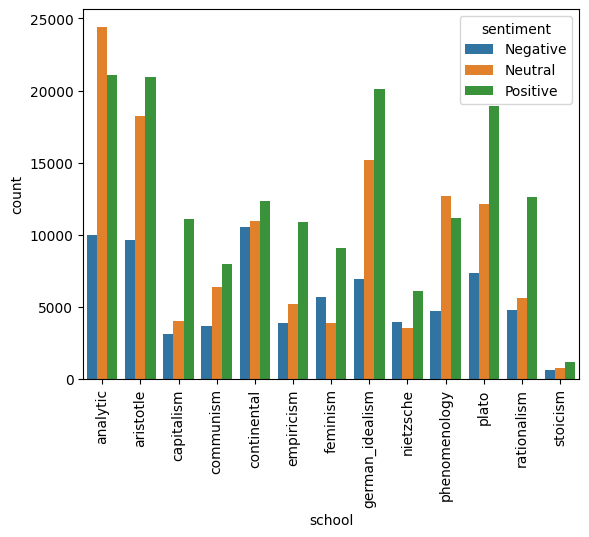

In [20]:
df_sentiment = df.groupby(['school', 'sentiment'])['title'].count().reset_index()
df_sentiment.rename(columns={'title':'count'}, inplace=True)
sns.barplot(data=df_sentiment, x="school", y="count", hue="sentiment")
plt.xticks(rotation=90)

In [21]:
school_total = df.groupby('school')['title'].count().to_dict()
df_sentiment.head()

school sentiment  count
0   analytic  Negative   9941
1   analytic   Neutral  24427
2   analytic  Positive  21057
3  aristotle  Negative   9598
4  aristotle   Neutral  18254

In [22]:
# create a column of ratio for each sentiment
df_sentiment['total'] = df_sentiment['school'].map(school_total)
df_sentiment['ratio'] = df_sentiment['count'] / df_sentiment['total']
df_sentiment.head()

school sentiment  count  total     ratio
0   analytic  Negative   9941  55425  0.179359
1   analytic   Neutral  24427  55425  0.440722
2   analytic  Positive  21057  55425  0.379919
3  aristotle  Negative   9598  48779  0.196765
4  aristotle   Neutral  18254  48779  0.374218

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'analytic'),
  Text(1, 0, 'aristotle'),
  Text(2, 0, 'capitalism'),
  Text(3, 0, 'communism'),
  Text(4, 0, 'continental'),
  Text(5, 0, 'empiricism'),
  Text(6, 0, 'feminism'),
  Text(7, 0, 'german_idealism'),
  Text(8, 0, 'nietzsche'),
  Text(9, 0, 'phenomenology'),
  Text(10, 0, 'plato'),
  Text(11, 0, 'rationalism'),
  Text(12, 0, 'stoicism')])

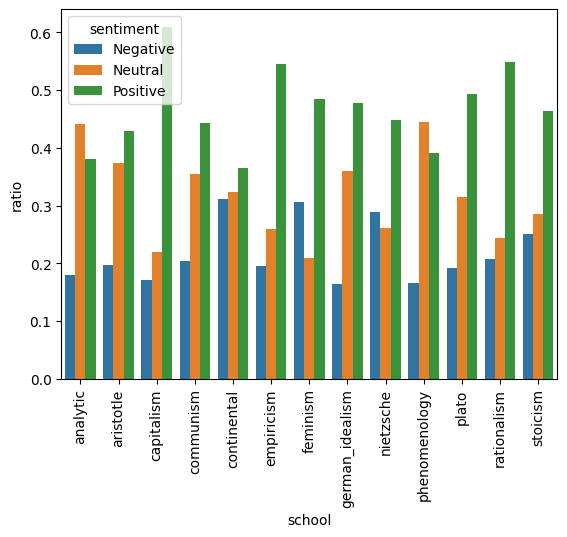

In [23]:
sns.barplot(data=df_sentiment, x="school", y="ratio", hue="sentiment")
plt.xticks(rotation=90)

In [24]:
df_sentiment[df_sentiment['sentiment'] == 'Positive'].sort_values(by = ['ratio'], ascending = False)

school sentiment  count  total     ratio
8        capitalism  Positive  11092  18194  0.609652
35      rationalism  Positive  12604  22949  0.549218
17       empiricism  Positive  10880  19931  0.545883
32            plato  Positive  18899  38366  0.492598
20         feminism  Positive   9041  18635  0.485162
23  german_idealism  Positive  20093  42136  0.476861
38         stoicism  Positive   1174   2535  0.463116
26        nietzsche  Positive   6081  13548  0.448849
11        communism  Positive   7956  17958  0.443034
5         aristotle  Positive  20927  48779  0.429017
29    phenomenology  Positive  11169  28573  0.390894
2          analytic  Positive  21057  55425  0.379919
14      continental  Positive  12300  33779  0.364132

In [25]:
df_sentiment[df_sentiment['sentiment'] == 'Negative'].sort_values(by = ['ratio'], ascending = False)

school sentiment  count  total     ratio
12      continental  Negative  10532  33779  0.311791
18         feminism  Negative   5704  18635  0.306091
24        nietzsche  Negative   3921  13548  0.289415
36         stoicism  Negative    636   2535  0.250888
33      rationalism  Negative   4752  22949  0.207068
9         communism  Negative   3646  17958  0.203029
3         aristotle  Negative   9598  48779  0.196765
15       empiricism  Negative   3888  19931  0.195073
30            plato  Negative   7359  38366  0.191810
0          analytic  Negative   9941  55425  0.179359
6        capitalism  Negative   3118  18194  0.171375
27    phenomenology  Negative   4722  28573  0.165261
21  german_idealism  Negative   6887  42136  0.163447

In [26]:
df_sentiment[df_sentiment['sentiment'] == 'Neutral'].sort_values(by = ['ratio'], ascending = False)

school sentiment  count  total     ratio
28    phenomenology   Neutral  12682  28573  0.443846
1          analytic   Neutral  24427  55425  0.440722
4         aristotle   Neutral  18254  48779  0.374218
22  german_idealism   Neutral  15156  42136  0.359692
10        communism   Neutral   6356  17958  0.353937
13      continental   Neutral  10947  33779  0.324077
31            plato   Neutral  12108  38366  0.315592
37         stoicism   Neutral    725   2535  0.285996
25        nietzsche   Neutral   3546  13548  0.261736
16       empiricism   Neutral   5163  19931  0.259044
34      rationalism   Neutral   5593  22949  0.243714
7        capitalism   Neutral   3984  18194  0.218973
19         feminism   Neutral   3890  18635  0.208747

## Conclusion
After graphing and comparing the ratio of each sentiment in each shcools, we finally found that capitalism has the most positive texts, continental has the most negative texts, and phenomenology has the most neutral texts. During the process of exploring the data and solving the problem, there are some different aproaches I could use, such as bag of word, nltk, and modeling. The reason I am using the sentiment anlyzer is because this is a new method that I have never used before. I think the result turns out very good and I would like to learn more method of solving problems in the future.